In [35]:
import pandas as pd
import numpy as np
import json
import os
from tqdm import tqdm
import time
import re
from IPython.display import display
from pathlib import Path 
DATAPATH = Path(r'Data')

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
filepath = 'games_Ligue-1-2015-2022.csv'

In [37]:
games = pd.read_csv(DATAPATH /filepath)

In [38]:
with pd.option_context('display.max_columns', None) :
    display(games.describe())


,GAME_ID,TEAM_ID_HOME,TEAM_ID_AWAY,gameweek,possession_home,possession_away,shot_on_target_home,shot_on_target_away,saves_home,saves_away,year,quarter,month,week,day,weekday,is_monday,is_tuesday,is_wednesday,is_thursday,is_friday,is_saturday,is_sunday,shot_total_home,shot_total_away,saves_total_home,saves_total_away,goal_home,goal_away,points_result_home,points_result_away,SEASON_ID,gameweek_HOME,points_result_HOME,shot_on_target_HOME,saves_HOME,shot_total_HOME,saves_total_HOME,goal_HOME,points_result_against_HOME,shot_on_target_against_HOME,saves_against_HOME,shot_total_against_HOME,saves_total_against_HOME,goal_against_HOME,cumul_points_result_HOME,cumul_shot_on_target_HOME,cumul_saves_HOME,cumul_shot_total_HOME,cumul_saves_total_HOME,cumul_goal_HOME,cumul_points_result_against_HOME,cumul_shot_on_target_against_HOME,cumul_saves_against_HOME,cumul_shot_total_against_HOME,cumul_saves_total_against_HOME,cumul_goal_against_HOME,goal_difference_HOME,cumul_average_points_result_HOME,cumul_average_shot_on_target_HOME,cumul_average_saves_HOME,cumul_average_shot_total_HOME,cumul_average_saves_total_HOME,cumul_average_goal_HOME,cumul_average_points_result_against_HOME,cumul_average_shot_on_target_against_HOME,cumul_average_saves_against_HOME,cumul_average_shot_total_against_HOME,cumul_average_saves_total_against_HOME,cumul_average_goal_against_HOME,moving_average_1_points_result_HOME,moving_average_2_points_result_HOME,moving_average_3_points_result_HOME,moving_average_4_points_result_HOME,moving_average_5_points_result_HOME,moving_average_6_points_result_HOME,moving_average_1_shot_on_target_HOME,moving_average_2_shot_on_target_HOME,moving_average_3_shot_on_target_HOME,moving_average_4_shot_on_target_HOME,moving_average_5_shot_on_target_HOME,moving_average_6_shot_on_target_HOME,moving_average_1_saves_HOME,moving_average_2_saves_HOME,moving_average_3_saves_HOME,moving_average_4_saves_HOME,moving_average_5_saves_HOME,moving_average_6_saves_HOME,moving_average_1_shot_total_HOME,moving_average_2_shot_total_HOME,moving_average_3_shot_total_HOME,moving_average_4_shot_total_HOME,moving_average_5_shot_total_HOME,moving_average_6_shot_total_HOME,moving_average_1_saves_total_HOME,moving_average_2_saves_total_HOME,moving_average_3_saves_total_HOME,moving_average_4_saves_total_HOME,moving_average_5_saves_total_HOME,moving_average_6_saves_total_HOME,moving_average_1_goal_HOME,moving_average_2_goal_HOME,moving_average_3_goal_HOME,moving_average_4_goal_HOME,moving_average_5_goal_HOME,moving_average_6_goal_HOME,moving_average_1_points_result_against_HOME,moving_average_2_points_result_against_HOME,moving_average_3_points_result_against_HOME,moving_average_4_points_result_against_HOME,moving_average_5_points_result_against_HOME,moving_average_6_points_result_against_HOME,moving_average_1_shot_on_target_against_HOME,moving_average_2_shot_on_target_against_HOME,moving_average_3_shot_on_target_against_HOME,moving_average_4_shot_on_target_against_HOME,moving_average_5_shot_on_target_against_HOME,moving_average_6_shot_on_target_against_HOME,moving_average_1_saves_against_HOME,moving_average_2_saves_against_HOME,moving_average_3_saves_against_HOME,moving_average_4_saves_against_HOME,moving_average_5_saves_against_HOME,moving_average_6_saves_against_HOME,moving_average_1_shot_total_against_HOME,moving_average_2_shot_total_against_HOME,moving_average_3_shot_total_against_HOME,moving_average_4_shot_total_against_HOME,moving_average_5_shot_total_against_HOME,moving_average_6_shot_total_against_HOME,moving_average_1_saves_total_against_HOME,moving_average_2_saves_total_against_HOME,moving_average_3_saves_total_against_HOME,moving_average_4_saves_total_against_HOME,moving_average_5_saves_total_against_HOME,moving_average_6_saves_total_against_HOME,moving_average_1_goal_against_HOME,moving_average_2_goal_against_HOME,moving_average_3_goal_against_HOME,moving_average_4_goal_against_HOME,moving_average_5_goal_against_HOME,moving_average_6_goal_against_HOME,fatigue_1

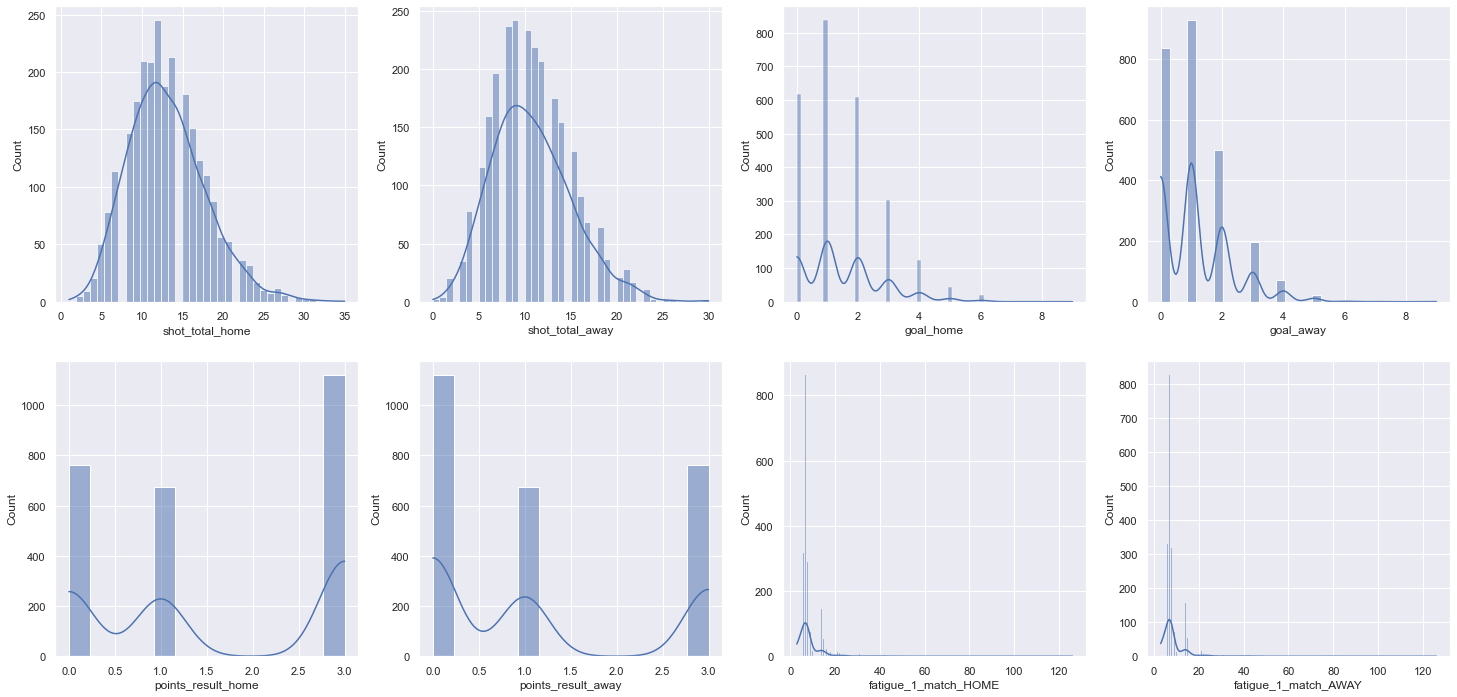

In [39]:
value_list = ['shot_total_home', 'shot_total_away', 
              'goal_home', 'goal_away', 
              'points_result_home', 'points_result_away',
              'fatigue_1_match_HOME', 'fatigue_1_match_AWAY'
             ]

sns.set(rc={'figure.figsize':(25,25)})
for i, column in enumerate(value_list, 1):
    plt.subplot(4,4,i)
    p=sns.histplot(x=column, data=games, stat='count', kde=True)

## Correlation

In [40]:
# If home wins : 2, draw : 1, Lose : 0
games['HOME_WINS'] = np.where(games["points_result_home"] == 3, 2,
         np.where(games["points_result_home"] == 1, 1,
                  0))

In [41]:
features = ['HOME_WINS',
       'possession_home', 'possession_away', 'shot_on_target_home',
       'shot_on_target_away', 'saves_home', 'saves_away', 'year',
       'quarter', 'month', 'week', 'day', 'weekday', 'is_monday',
       'is_tuesday', 'is_wednesday', 'is_thursday', 'is_friday',
       'is_saturday', 'is_sunday', 'shot_total_home', 'shot_total_away',
       'saves_total_home', 'saves_total_away', 'goal_home', 'goal_away',
       'points_result_home', 'points_result_away',
       'cumul_points_result_HOME', 'cumul_shot_on_target_HOME',
       'cumul_saves_HOME', 'cumul_shot_total_HOME', 'cumul_goal_HOME',
       'cumul_points_result_against_HOME',
       'cumul_shot_on_target_against_HOME', 'cumul_saves_against_HOME',
       'cumul_shot_total_against_HOME', 'cumul_goal_against_HOME',
       'goal_difference_HOME', 'cumul_average_points_result_HOME',
       'cumul_average_shot_on_target_HOME', 'cumul_average_saves_HOME',
       'cumul_average_shot_total_HOME', 'cumul_average_goal_HOME',
       'cumul_average_points_result_against_HOME',
       'cumul_average_shot_on_target_against_HOME',
       'cumul_average_saves_against_HOME',
       'cumul_average_shot_total_against_HOME',
       'cumul_average_goal_against_HOME',
       'moving_average_2_points_result_HOME',
       'moving_average_2_goal_HOME',
       'moving_average_2_points_result_against_HOME',
       'moving_average_2_goal_against_HOME',
       'moving_average_3_points_result_HOME',
       'moving_average_3_goal_HOME',
       'moving_average_3_points_result_against_HOME',
       'moving_average_3_goal_against_HOME',
       'moving_average_6_points_result_HOME',
       'moving_average_6_goal_HOME',
       'moving_average_6_points_result_against_HOME',
       'moving_average_6_goal_against_HOME', 'fatigue_1_match_HOME',
       'fatigue_2_match_HOME', 'fatigue_3_match_HOME',
       'cumul_points_result_AWAY', 'cumul_shot_on_target_AWAY',
       'cumul_saves_AWAY', 'cumul_shot_total_AWAY', 'cumul_goal_AWAY',
       'cumul_points_result_against_AWAY',
       'cumul_shot_on_target_against_AWAY', 'cumul_saves_against_AWAY',
       'cumul_shot_total_against_AWAY', 'cumul_goal_against_AWAY',
       'goal_difference_AWAY', 'cumul_average_points_result_AWAY',
       'cumul_average_shot_on_target_AWAY', 'cumul_average_saves_AWAY',
       'cumul_average_shot_total_AWAY', 'cumul_average_goal_AWAY',
       'cumul_average_points_result_against_AWAY',
       'cumul_average_shot_on_target_against_AWAY',
       'cumul_average_saves_against_AWAY',
       'cumul_average_shot_total_against_AWAY',
       'cumul_average_goal_against_AWAY',
       'moving_average_2_points_result_AWAY',
       'moving_average_2_goal_AWAY',
       'moving_average_2_points_result_against_AWAY',
       'moving_average_2_goal_against_AWAY',
       'moving_average_3_points_result_AWAY',
       'moving_average_3_goal_AWAY',
       'moving_average_3_points_result_against_AWAY',
       'moving_average_3_goal_against_AWAY',
       'moving_average_6_points_result_AWAY',
       'moving_average_6_goal_AWAY',
       'moving_average_6_points_result_against_AWAY',
       'moving_average_6_goal_against_AWAY', 'fatigue_1_match_AWAY',
       'fatigue_2_match_AWAY', 'fatigue_3_match_AWAY'
]

<AxesSubplot:>

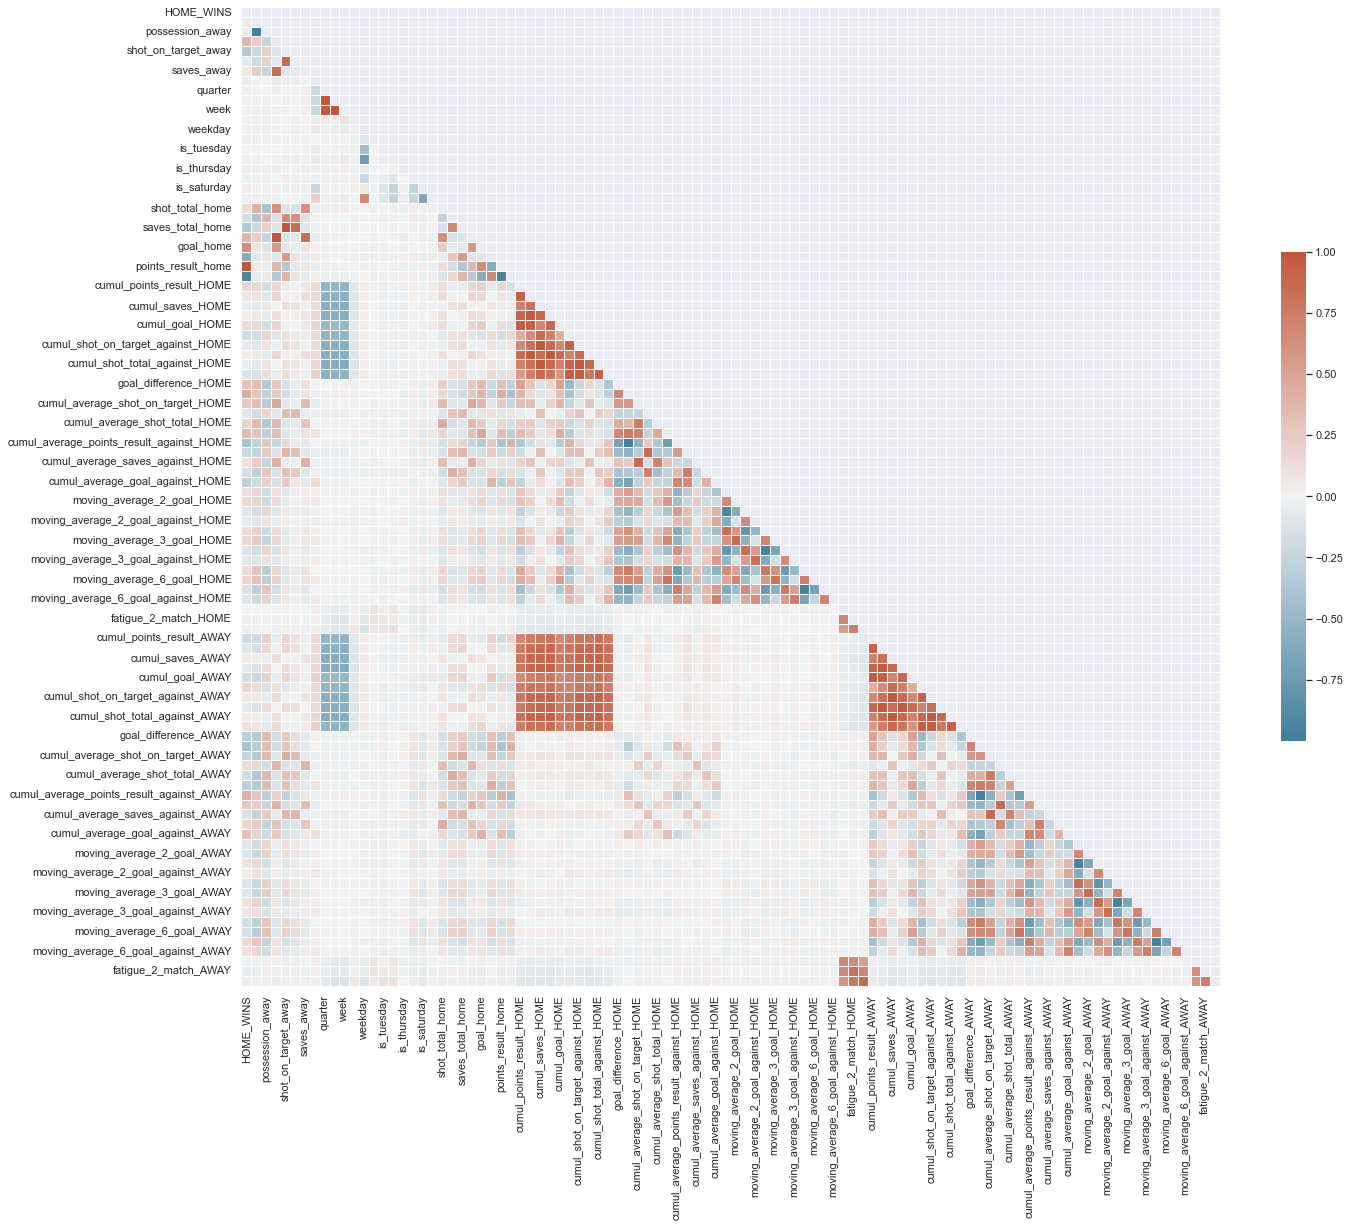

In [42]:
# Compute the correlation matrix
corr = games[features].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### correlation with target (Home wins)

<AxesSubplot:>

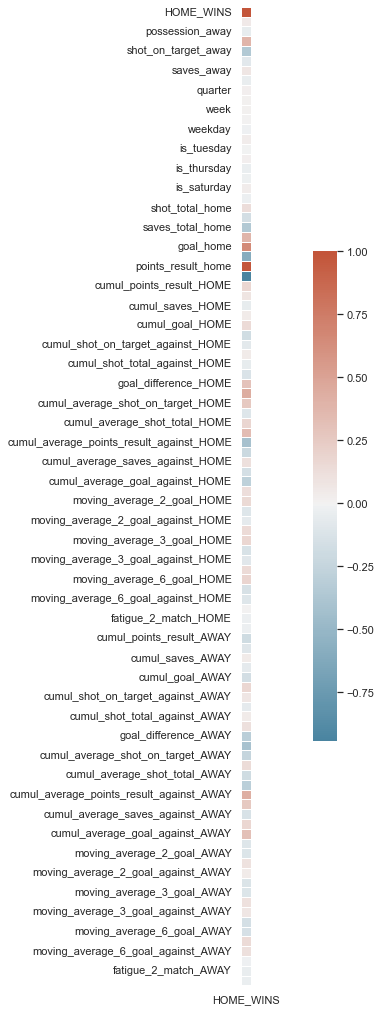

In [43]:
# Compute the correlation matrix
target_corr = pd.DataFrame(corr["HOME_WINS"])

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(target_corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [44]:
target_corr

,HOME_WINS
HOME_WINS,1.000000
possession_home,0.050944
possession_away,-0.050989
shot_on_target_home,0.383080
shot_on_target_away,-0.355308
...,...
moving_average_6_points_result_against_AWAY,0.148636
moving_average_6_goal_against_AWAY,0.117227
fatigue_1_match_AWAY,-0.009483
fatigue_2_match_AWAY,-0.039386


In [45]:
target_corr.sort_values(by = "HOME_WINS", ascending = False)

,HOME_WINS
HOME_WINS,1.000000
points_result_home,1.000000
goal_home,0.655121
cumul_average_points_result_HOME,0.439242
cumul_average_points_result_against_AWAY,0.428803
...,...
shot_on_target_away,-0.355308
cumul_average_points_result_AWAY,-0.406802
cumul_average_points_result_against_HOME,-0.412255
goal_away,-0.599830


## Split data into train/test set

In [46]:
# train : 2015-2021 /  test : 2021-2022
last_season_train = games['SEASON_ID'].unique()[-2]
last_season_test = games['SEASON_ID'].unique()[-1]

train = games[games['SEASON_ID'] < (last_season_train)]
test = games[games['SEASON_ID'] >= (last_season_test)]

train.to_csv(DATAPATH / "train.csv",index=False)
test.to_csv(DATAPATH / "test.csv",index=False)



In [34]:
# Comment to see change